In [1]:
# 1. Mounts Google Drive
from google.colab import drive  # Mount your Google Drive
drive.mount('/content/drive')   # Authorize when prompted
# 2. Imports Libraries
import pandas as pd
import os
import glob
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
# 3. Prints Current Date and Time
import datetime
# Get the current date and time
current_datetime = datetime.datetime.now()
# Print the current date and time
print(current_datetime)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2025-08-14 21:23:47.227910


In [2]:
# Search in your entire Google Drive (may take some time)
file_paths = glob.glob('/content/drive/MyDrive/sorted_df_var_*.csv', recursive=True)

# Extract just the filenames
file_names = [os.path.basename(path) for path in file_paths]

# Sort the filenames alphabetically
file_names.sort()

print(type(file_names))

# Print the sorted filenames
for name in file_names:
    print(name)

print(file_names[-1])

csv_path = '/content/drive/MyDrive/' + file_names[-1]

<class 'list'>
sorted_df_var_202506171543.csv
sorted_df_var_202506192121.csv
sorted_df_var_202506192139.csv
sorted_df_var_202506192139.csv


In [3]:
#import glob
#import os
import time # Import time module for ctime

def get_latest_csv_by_mtime(directory_path, file_pattern):
    """
    Finds the most recently modified CSV file matching a pattern in a directory.

    Args:
        directory_path (str): The base directory to search (e.g., '/content/drive/MyDrive/').
        file_pattern (str): The filename pattern (e.g., 'sorted_df_var_*.csv').

    Returns:
        str: The full path to the most recently modified CSV file, or None if no files are found.
    """
    search_path = os.path.join(directory_path, file_pattern)
    file_paths = glob.glob(search_path, recursive=True)

    if not file_paths:
        print(f"No files found matching the pattern: {search_path}")
        return None

    latest_file = None
    latest_mtime = 0  # Initialize with a very old timestamp

    print(f"Searching for files matching: {search_path}")
    print(f"Found {len(file_paths)} potential files.")

    for path in file_paths:
        try:
            # Get modification time (mtime)
            mtime = os.path.getmtime(path)
            if mtime > latest_mtime:
                latest_mtime = mtime
                latest_file = path
        except FileNotFoundError:
            # Handle cases where a file might have been deleted between glob and os.path.getmtime
            print(f"Warning: File not found during mtime check: {path}")
            continue
        except Exception as e:
            print(f"Error processing file {path}: {e}")
            continue

    if latest_file:
        print(f"\nMost recently modified file (by mtime): {os.path.basename(latest_file)}")
        print(f"Modification Time: {time.ctime(latest_mtime)}") # Human-readable time
    else:
        print("Could not determine the latest file.")

    return latest_file

# --- Usage ---
drive_root = '/content/drive/MyDrive/' # Define once for clarity and easy modification
csv_pattern = 'sorted_df_var_*.csv'

# Example usage
latest_csv_path = get_latest_csv_by_mtime(drive_root, csv_pattern)

if latest_csv_path:
    print(f"Path to the latest CSV: {latest_csv_path}")
    # Now you can use latest_csv_path, e.g., to load it with pandas
    # import pandas as pd
    # df = pd.read_csv(latest_csv_path)
else:
    print("No suitable CSV file found to process.")

Searching for files matching: /content/drive/MyDrive/sorted_df_var_*.csv
Found 3 potential files.

Most recently modified file (by mtime): sorted_df_var_202506192139.csv
Modification Time: Thu Jun 19 21:42:01 2025
Path to the latest CSV: /content/drive/MyDrive/sorted_df_var_202506192139.csv


In [4]:
# Search in your entire Google Drive (may take some time)
lstm_file_paths = glob.glob('/content/drive/My Drive/LSTM_DOY/LSTM_results_DOY_grid_search/best_KGE/best_KGE_result_*.csv', recursive=True)

# Extract just the filenames
lstm_file_names = [os.path.basename(path) for path in lstm_file_paths]

# Sort the filenames alphabetically
lstm_file_names.sort()




# Print the sorted filenames
for name in lstm_file_names:
    print(name)

print(lstm_file_names[-1])




lstm_csv_path = '/content/drive/My Drive/LSTM_DOY/LSTM_results_DOY_grid_search/best_KGE/' + lstm_file_names[-1]

best_KGE_result_202506290309.csv
best_KGE_result_202506300437.csv
best_KGE_result_202506301442.csv
best_KGE_result_202506301730.csv
best_KGE_result_202506302246.csv
best_KGE_result_202506302246.csv


In [5]:
rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
#print(rf.dtypes)

lstm = pd.read_csv( lstm_csv_path)
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)

print( rf[~rf['site_no'].isin( lstm['model_site']    ) ]  )
#

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [6]:
rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
#print(rf.dtypes)

lstm = pd.read_csv( lstm_csv_path)
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [7]:
merged_df = pd.merge( rf,  lstm #, on='site_no'
                     , left_on='site_no', right_on='model_site'
                     , how='inner')
#merged_df['KGE_y'] = merged_df['KGE_y']#.astype('float64')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)


merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

merged_df = merged_df[ ['site_no', 'KGE_x', 'KGE_y'] ]

merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

print(merged_df.dtypes)
print(merged_df)
print(merged_df[ ['Random Forest', 'LSTM'] ].describe())

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
     site_no  Random Forest   LSTM
0   13310800       0.926769  0.921
1   13192200       0.859797  0.863
2   13311450       0.907758  0.894
3   13311000       0.939221  0.912
4   13154500       0.729285  0.949
5   13092747       0.704597  0.896
6   13211205       0.889599  0.930
7   13311250       0.906752  0.966
8   13317660       0.915618  0.983
9   13310850       0.904339  0.939
10  13296000       0.875657  0.956
11  13150430       0.866316  0.903
12  13307000       0.909612  0.943
13  13341050       0.712652  0.829
14  13342500       0.752785  0.834
15  13190500       0.688853  0.612
16  13340600       0.943870  0.974
17  12305000       0.779612  0.881
18  13304050       0.498039  0.773
19  13340000       0.945548  0.965
20  13176400       0.841286  0.927
21  12322000       0.673606  0.864
22  13213000       0.481536  0.943
       Random Forest       LSTM
count      23.000000  23.000000
mean   

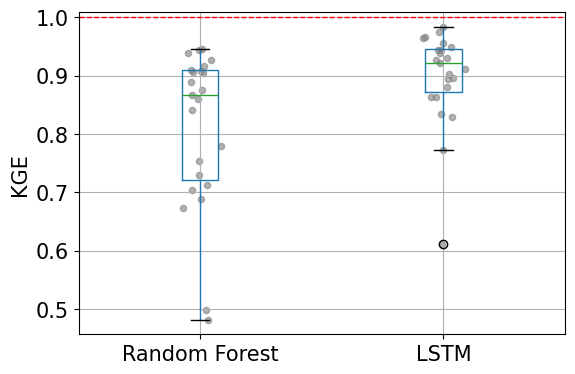

In [8]:
import matplotlib.pyplot as plt
import numpy as np

dpi = 400

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "KGE")
plt.tight_layout()

# Save the figure
plt.savefig("kge.jpg", dpi= dpi)  # Saves as a PNG file

plt.show()

     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

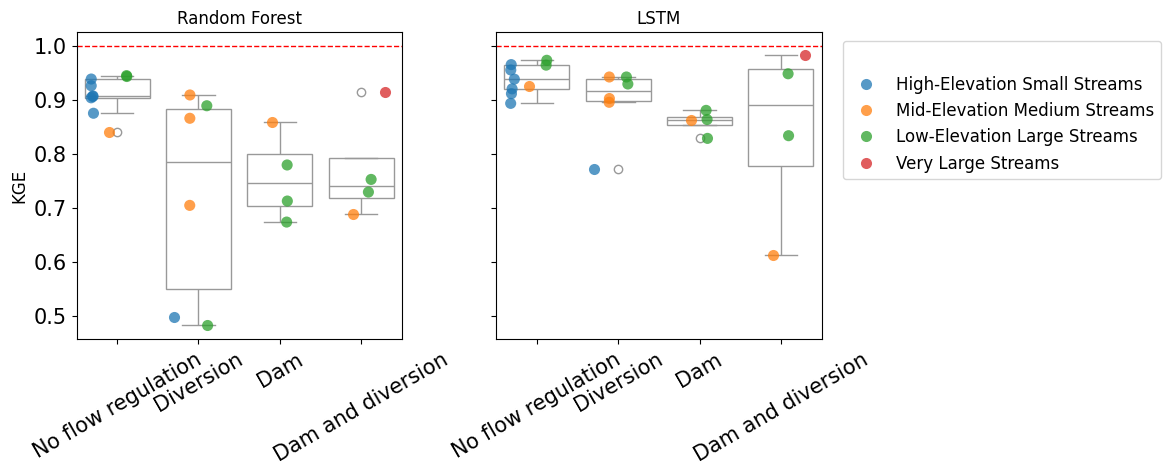

In [9]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print(reg_kmean_pasta)

df = pd.merge( merged_df,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')
print(df)

# Visualization parameters
PLOT_PARAMS = {
    'rotation': 30,
}
size = 8

ylabel = "KGE"
jpg= 'reg_rf_lstm_kge.jpg'

order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= PLOT_PARAMS['rotation'])   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation=  PLOT_PARAMS['rotation'] )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi= dpi, bbox_inches='tight')

plt.show()

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
merged_df_KGE_r_comp      site_no  Random Forest   LSTM
0   13310800       0.945224  0.975
1   13192200       0.937290  0.937
2   13311450       0.958200  0.981
3   13311000       0.945355  0.965
4   13154500       0.835240  0.951
5   13092747       0.832122  0.921
6   13211205       0.957531  0.976
7   13311250       0.959334  0.987
8   13317660       0.972234  0.983
9   13310850       0.923556  0.965
10  13296000       0.957492  0.974
11  13150430       0.884287  0.919
12  13307000       0.935141  0.978
13  13341050       0.769771  0.835
14  13342500       0.771025  0.842
15  13190500       0.880205  0.992
16  13340600       0.958576  0.988
17  12305000       0.790486  0.885
18  13304050       0.852819  0.889
19  13340000       0.967602  0.977
20  13176400       0.888612  0.928
21  12322000       0.787386  0.890
22  13213000       0.533165  0.978


/tmp/ipython-input-2054008973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-2054008973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].astype('float64')


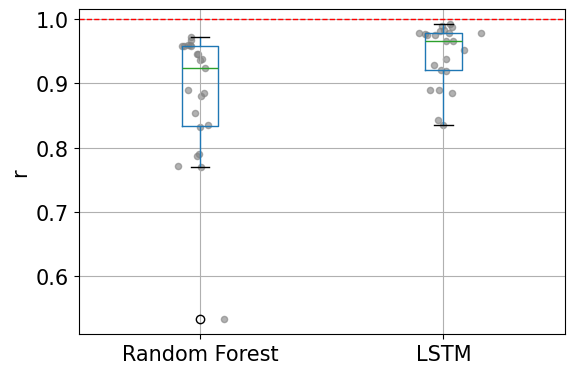

In [10]:
r_merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_r_comp = r_merged_df[ ['site_no', 'grid_correlation', 'KGE_r_comp'] ]

merged_df_KGE_r_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].apply(lambda x: x[1:6])
merged_df_KGE_r_comp['LSTM'] = merged_df_KGE_r_comp['LSTM'].astype('float64')

print(merged_df_KGE_r_comp.dtypes)

print("merged_df_KGE_r_comp",merged_df_KGE_r_comp)

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_r_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_r_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "r")
plt.tight_layout()

# Save the figure
plt.savefig("kge_r.png")  # Saves as a PNG file

plt.show()

     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

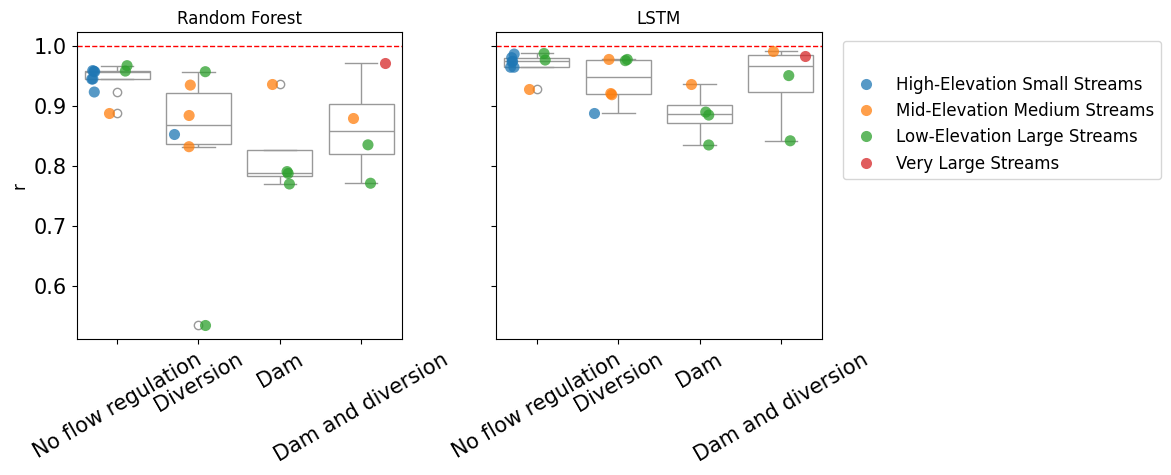

In [11]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print(reg_kmean_pasta)

df = pd.merge( merged_df_KGE_r_comp,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')
print(df)

rotation= 30
ylabel = "r"
jpg= 'reg_rf_lstm_r.jpg'

order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi=400, bbox_inches='tight')

plt.show()

     site_no                        labels   dam_and_diversion       amp  \
0   12305000   Low-Elevation Large Streams                 Dam  0.501713   
1   12322000   Low-Elevation Large Streams                 Dam  0.595400   
2   13092747  Mid-Elevation Medium Streams           Diversion  0.471255   
3   13150430  Mid-Elevation Medium Streams           Diversion  0.632628   
4   13154500   Low-Elevation Large Streams   Dam and diversion  0.439203   
5   13176400  Mid-Elevation Medium Streams  No flow regulation  0.945167   
6   13190500  Mid-Elevation Medium Streams   Dam and diversion  0.258282   
7   13192200  Mid-Elevation Medium Streams                 Dam  0.399247   
8   13211205   Low-Elevation Large Streams           Diversion  0.613282   
9   13213000   Low-Elevation Large Streams           Diversion  0.656940   
10  13296000  High-Elevation Small Streams  No flow regulation  0.567011   
11  13304050  High-Elevation Small Streams           Diversion  0.569762   
12  13307000

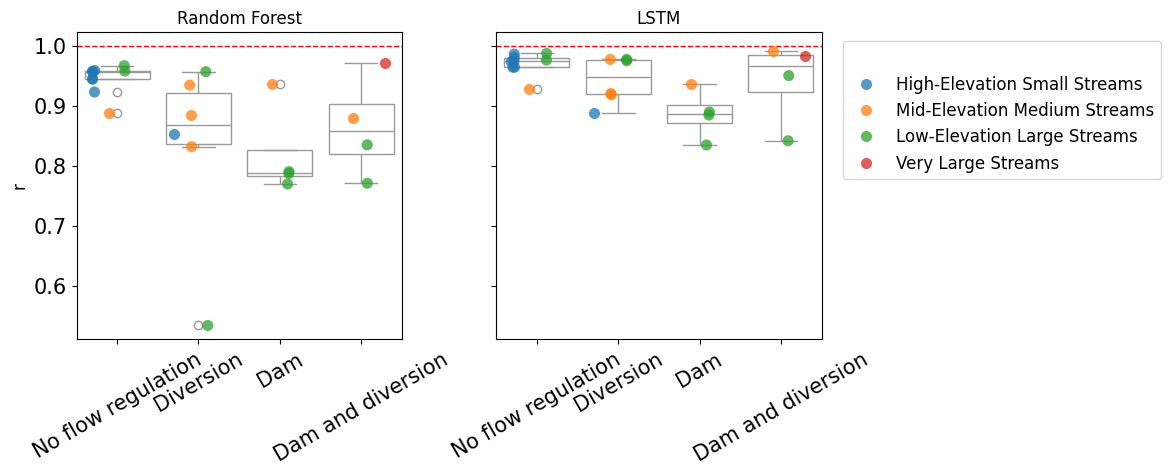

In [12]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print(reg_kmean_pasta)

df = pd.merge( merged_df_KGE_r_comp,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')
print(df)

rotation= 30
ylabel = "r"
jpg= 'reg_rf_lstm_r.jpg'

order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi=400, bbox_inches='tight')

plt.show()

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
merged_df_KGE_alpha_comp      site_no  Random Forest   LSTM
0   13310800       0.958528  0.942
1   13192200       1.124802  1.121
2   13311450       0.919909  0.906
3   13311000       1.023751  1.079
4   13154500       0.785208  1.011
5   13092747       0.756972  0.934
6   13211205       0.899286  0.935
7   13311250       0.916090  0.969
8   13317660       0.920348  0.997
9   13310850       1.011385  1.025
10  13296000       0.885029  0.974
11  13150430       0.933781  1.053
12  13307000       0.940798  1.039
13  13341050       0.828321  1.037
14  13342500       0.907092  1.051
15  13190500       0.735846  1.382
16  13340600       0.962469  0.981
17  12305000       0.945540  1.027
18  13304050       0.520205  0.810
19  13340000       0.956238  1.026
20  13176400       0.888845  1.000
21  12322000       0.753826  0.934
22  13213000       0.782647  0.947


/tmp/ipython-input-3820751258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-3820751258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].astype('float64')


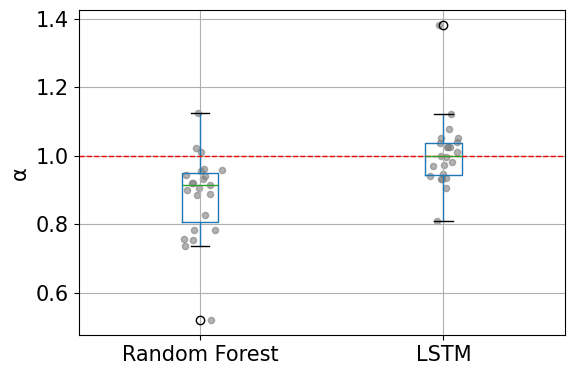

In [13]:
alpha_merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_alpha_comp = alpha_merged_df[ ['site_no', 'KGE_Alpha', 'KGE_alpha_comp'] ]

merged_df_KGE_alpha_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].apply(lambda x: x[1:6])
merged_df_KGE_alpha_comp['LSTM'] = merged_df_KGE_alpha_comp['LSTM'].astype('float64')

print(merged_df_KGE_alpha_comp.dtypes)

print("merged_df_KGE_alpha_comp",merged_df_KGE_alpha_comp)

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_alpha_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_alpha_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "α")
plt.tight_layout()

plt.savefig("kge_ALPHA.png")

plt.show()

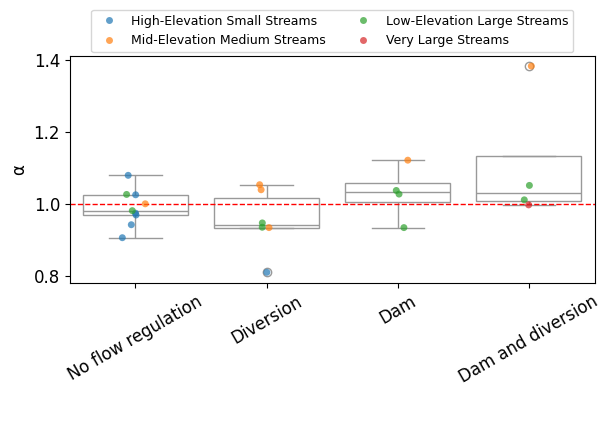

In [14]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
#print(reg_kmean_pasta)

df = pd.merge( merged_df_KGE_alpha_comp,  reg_kmean_pasta,on='site_no'#, left_on='site_no', right_on='site_no'
, how='inner')
#print(df)

x = "dam_and_diversion"
y = "LSTM"
ylabel = "α"
fontsize = 12

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ])

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",
              alpha=0.7, jitter=True)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2, fontsize=  9)

plt.xticks(rotation= 30 , fontsize= fontsize )
plt.yticks(  fontsize= fontsize )

plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
plt.title(" ")

plt.tight_layout()
dpi=500
#plt.savefig('alpha.eps', format='eps', dpi= dpi)
#plt.savefig('alpha.jpg', dpi= dpi)

plt.show()

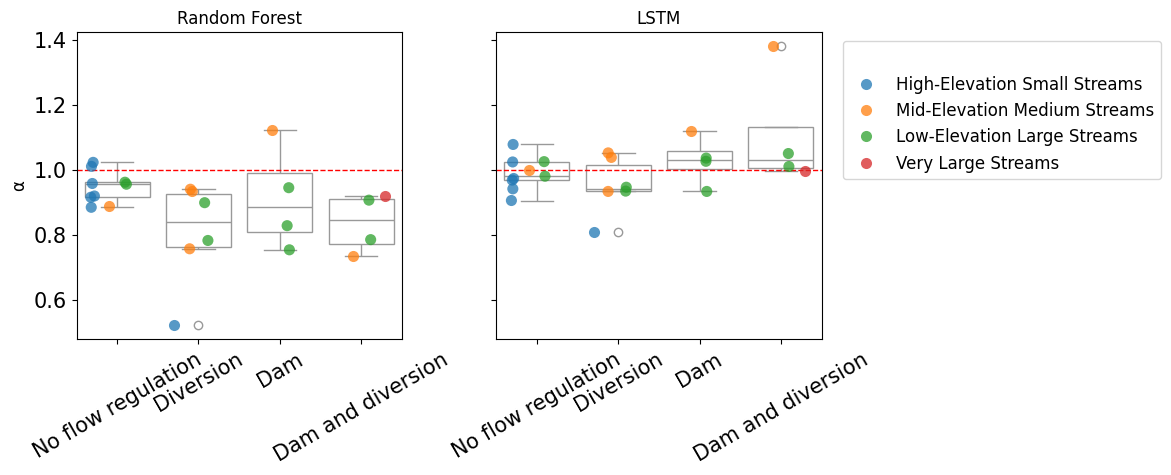

In [15]:
rotation= 30
ylabel = "α"
jpg= 'reg_rf_lstm_alpha.jpg'
order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi=400, bbox_inches='tight')

plt.show()

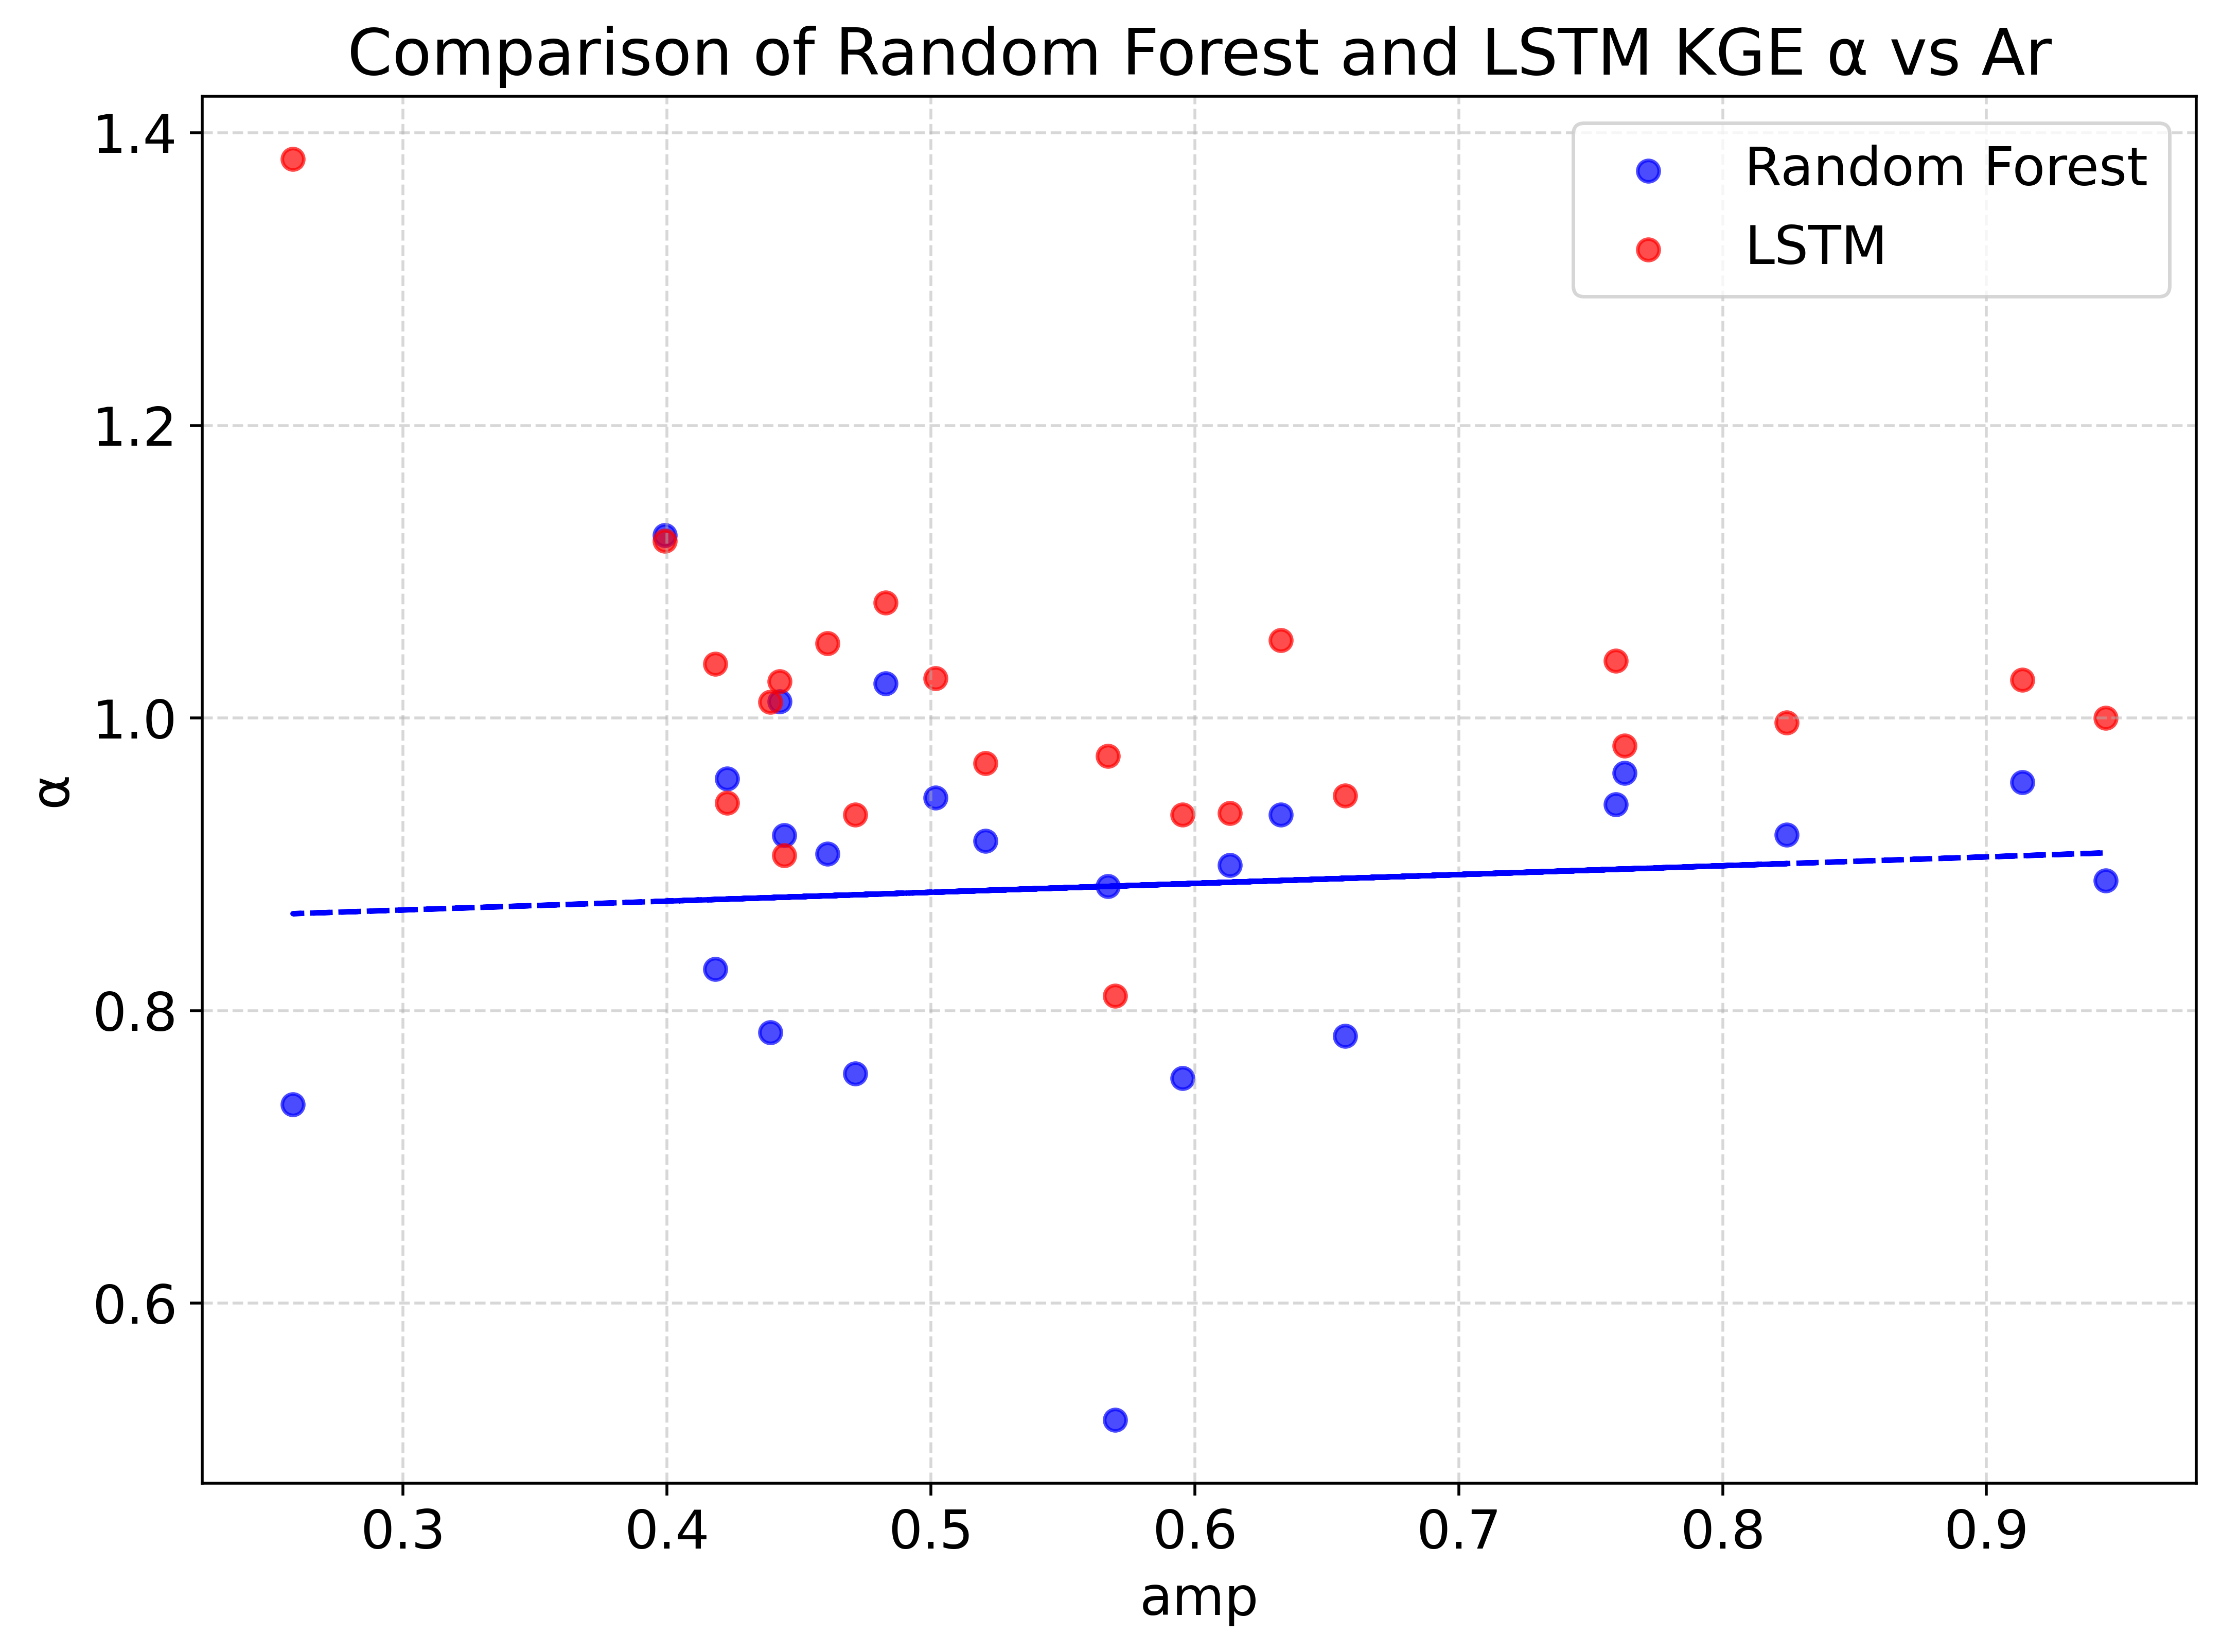

In [16]:
# Create figure with adjusted size and DPI for better quality
plt.figure(figsize=(10, 7), dpi= dpi)

plt.scatter(df['amp'], df['Random Forest'], color='blue', label='Random Forest', alpha=0.7)
# Fit a linear trend line (1st degree polynomial)
z = np.polyfit(df['amp'], df['Random Forest'], 1)
p = np.poly1d(z)
# Plot the trend line
plt.plot(df['amp'], p(df['amp']), "b--")  # "r--" means red dashed line

plt.scatter(df['amp'], df['LSTM'], color='red', label='LSTM', alpha=0.7)

plt.xlabel('amp')
plt.ylabel('α')
plt.title('Comparison of Random Forest and LSTM KGE α vs Ar')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

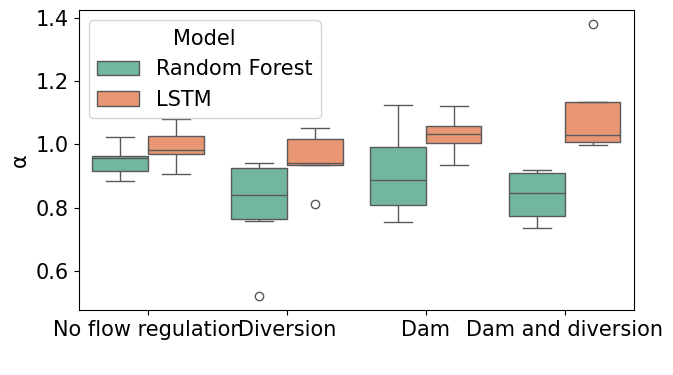

In [17]:
long = df.melt(
    id_vars='dam_and_diversion',            # columns to keep as‑is
    value_vars=['Random Forest', 'LSTM'],   # columns to unpivot
    var_name='Model',                       # new column with model names
    value_name='Metric'                     # new column with the values
)

plt.figure(figsize=(7,4))
sns.boxplot(
    data=long,
    x='dam_and_diversion',    # category on the x‑axis
    y='Metric',               # numeric values
    hue='Model',              # one box per model inside each category
    palette="Set2",  # More distinct colors
    dodge=True                # keeps the boxes side‑by‑side
    ,   order= [ "No flow regulation","Diversion","Dam","Dam and diversion"
                                                  ]
)

plt.xlabel(' ')
plt.ylabel( "α")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1053203060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_beta_comp['LSTM'] =  merged_df_KGE_beta_comp['LSTM'].apply(lambda x: x[1:6])
/tmp/ipython-input-1053203060.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_KGE_beta_comp['LSTM'] =  merged_df_KGE_beta_comp['LSTM'].astype('float64')


merged_df_KGE_beta_comp      site_no  Random Forest   LSTM
0   13310800       0.974654  0.952
1   13192200       1.012200  1.011
2   13311450       0.981378  0.954
3   13311000       0.988003  0.989
4   13154500       0.997849  1.006
5   13092747       0.995900  1.012
6   13211205       0.984461  0.993
7   13311250       0.999269  0.993
8   13317660       1.002232  0.998
9   13310850       0.943629  0.957
10  13296000       0.979117  0.976
11  13150430       1.009845  0.998
12  13307000       0.978589  0.966
13  13341050       0.990510  1.019
14  13342500       0.992684  1.006
15  13190500       1.112624  1.064
16  13340600       1.005111  1.012
17  12305000       1.041337  0.987
18  13304050       0.990021  0.942
19  13340000       1.000489  1.004
20  13176400       0.979330  0.986
21  12322000       1.026956  1.045
22  13213000       0.939763  0.998


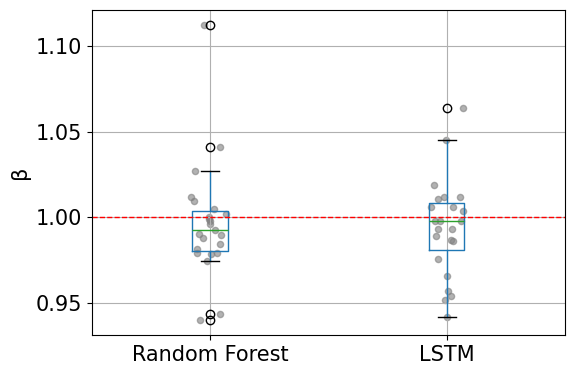

In [18]:
beta_merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

merged_df_KGE_beta_comp = beta_merged_df[ ['site_no', 'KGE_Beta', 'KGE_beta_comp'] ]


merged_df_KGE_beta_comp.columns=[ 'site_no', 'Random Forest', 'LSTM' ]


merged_df_KGE_beta_comp['LSTM'] =  merged_df_KGE_beta_comp['LSTM'].apply(lambda x: x[1:6])

merged_df_KGE_beta_comp['LSTM'] =  merged_df_KGE_beta_comp['LSTM'].astype('float64')

#print( merged_df_KGE_beta_comp.dtypes)

print("merged_df_KGE_beta_comp",merged_df_KGE_beta_comp)

plt.rcParams['font.size'] = 15
fig, ax = plt.subplots(figsize=(6, 4))

merged_df_KGE_beta_comp[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df_KGE_beta_comp[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "β")
plt.tight_layout()


plt.savefig("kge_beta.jpg", dpi = dpi)

plt.show()

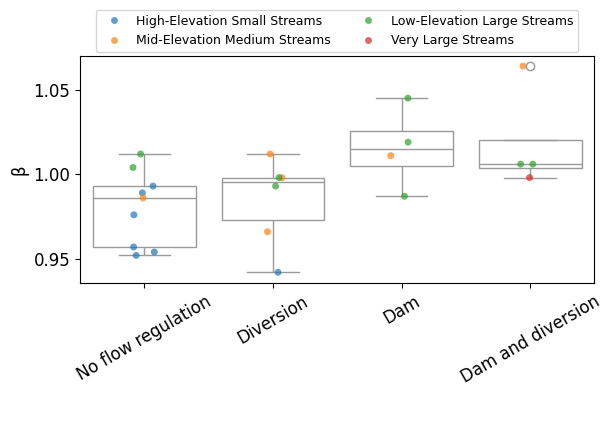

In [19]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )

df = pd.merge( merged_df_KGE_beta_comp,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')

x = "dam_and_diversion"
y = "LSTM"
ylabel = "β"
fontsize = 12

sns.boxplot(x= x, y= y , data= df, color = "white",   order= [ "No flow regulation"
                                                  ,"Diversion"
                                                  ,"Dam"
                                                  ,"Dam and diversion"
                                                  ]
           )

ax=sns.stripplot(x= x, y= y, data= df,
              hue="labels",
              alpha=0.7, jitter=True)

ax.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=2, fontsize=  9)

plt.xticks(rotation= 30 , fontsize= fontsize )

plt.yticks(  fontsize= fontsize )

plt.xlabel(" ")
plt.ylabel( ylabel , fontsize= fontsize  )
plt.title(" ")

plt.tight_layout()

plt.savefig(' .eps', format='eps', dpi=500)
plt.savefig(' .jpg', dpi=400)

plt.show()

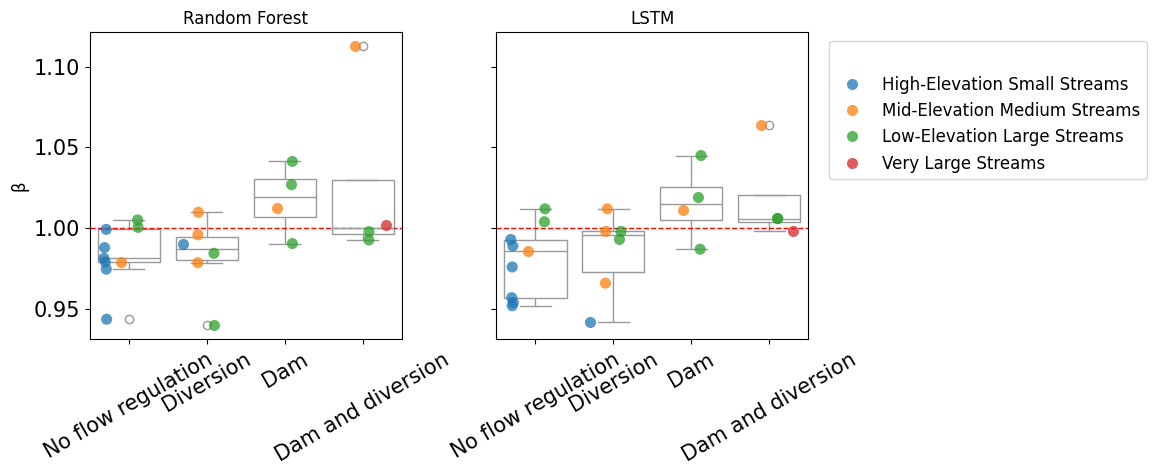

In [20]:
rotation= 30
ylabel = "β"
jpg= 'reg_rf_lstm_beta.jpg'
order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)

# Add horizontal line at y=1
axes[0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[0].set_ylabel( ylabel , fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, hue="labels", alpha=0.75, jitter=True, dodge=True, size = 8
)
# Add horizontal line at y=1
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig( jpg , dpi=400, bbox_inches='tight')

plt.show()

In [21]:
rmse_merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
#merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

rmse_merged_df = rmse_merged_df[ ['site_no', 'RMSE', 'rmse'] ]

rmse_merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

#print(rmse_merged_df.dtypes)
print("rmse_merged_df",rmse_merged_df)

# Summarize the 'Random Forest' and 'LSTM' columns
rmse_summary = rmse_merged_df[['Random Forest', 'LSTM']].describe()

print(rmse_summary)

rmse_merged_df      site_no  Random Forest      LSTM
0   13310800       0.561662  0.537939
1   13192200       0.571791  0.633519
2   13311450       0.598202  0.595560
3   13311000       0.622068  0.536455
4   13154500       0.640470  0.391271
5   13092747       0.696118  0.524550
6   13211205       0.727619  0.653220
7   13311250       0.733434  0.423191
8   13317660       0.772190  0.598156
9   13310850       0.844064  0.602786
10  13296000       0.872014  0.705799
11  13150430       0.897075  0.784763
12  13307000       0.957624  0.896221
13  13341050       1.028680  0.952942
14  13342500       1.031004  0.919624
15  13190500       1.050931  0.685778
16  13340600       1.130546  0.649738
17  12305000       1.162926  0.941078
18  13304050       1.199496  1.192107
19  13340000       1.207684  1.037632
20  13176400       1.210278  0.959484
21  12322000       1.408650  1.227244
22  13213000       1.583144  0.600796
       Random Forest       LSTM
count      23.000000  23.000000
mean     

creating a box plot with a scatter overlay

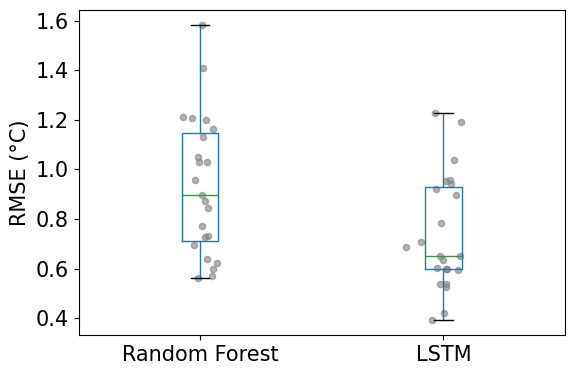

In [22]:
# Set all font sizes to 15
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(6, 4))

rmse_merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = rmse_merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

ax.set_ylabel( "RMSE (°C)")
plt.tight_layout()
plt.grid(False)
plt.savefig("rmse.png", dpi= dpi, bbox_inches='tight')  # Saves as a PNG file

plt.show()

In [23]:
df = pd.merge( rmse_merged_df,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')

print(df)

     site_no  Random Forest      LSTM                        labels  \
0   13310800       0.561662  0.537939  High-Elevation Small Streams   
1   13192200       0.571791  0.633519  Mid-Elevation Medium Streams   
2   13311450       0.598202  0.595560  High-Elevation Small Streams   
3   13311000       0.622068  0.536455  High-Elevation Small Streams   
4   13154500       0.640470  0.391271   Low-Elevation Large Streams   
5   13092747       0.696118  0.524550  Mid-Elevation Medium Streams   
6   13211205       0.727619  0.653220   Low-Elevation Large Streams   
7   13311250       0.733434  0.423191  High-Elevation Small Streams   
8   13317660       0.772190  0.598156            Very Large Streams   
9   13310850       0.844064  0.602786  High-Elevation Small Streams   
10  13296000       0.872014  0.705799  High-Elevation Small Streams   
11  13150430       0.897075  0.784763  Mid-Elevation Medium Streams   
12  13307000       0.957624  0.896221  Mid-Elevation Medium Streams   
13  13

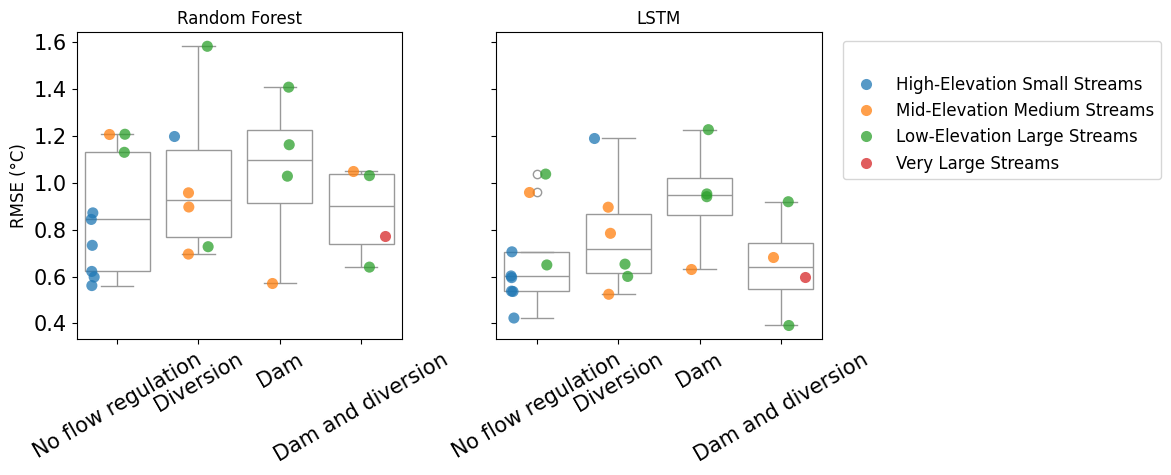

In [24]:
rotation= 30

order = ["No flow regulation", "Diversion", "Dam", "Dam and diversion"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ── Panel 1 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[0], x="dam_and_diversion", y="Random Forest",
    data=df, order=order,hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)
axes[0].set_ylabel("RMSE (°C)", fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("Random Forest", fontsize=12)
axes[0].tick_params(axis="x", rotation= rotation)   # optional tilt for readability
axes[0].legend_.remove()                     # defer legend to the 2nd axis

# ── Panel 2 ───────────────────────────────────────────────────
sns.boxplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, color="white"
)
sns.stripplot(
    ax=axes[1], x="dam_and_diversion", y="LSTM",
    data=df, order=order, hue="labels", alpha=0.75, jitter=True, dodge=True, size = size
)
axes[1].set_ylabel("")              # share-y already covers label
axes[1].set_xlabel("")
axes[1].set_title("LSTM", fontsize=12)
axes[1].tick_params(axis="x", rotation= rotation )

# Put a single legend just once
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title=" ", bbox_to_anchor=(1.04, 1), loc="upper left" , fontsize=12)

plt.tight_layout()

plt.savefig('reg_rf_lstm_rmse.jpg', dpi=400, bbox_inches='tight')

plt.show()

In [25]:
reg_kmean_pasta_path = '/content/drive/MyDrive/reg_kmean_pasta_path.csv'
reg_kmean_pasta = pd.read_csv( reg_kmean_pasta_path )
print('reg_kmean_pasta.head()',reg_kmean_pasta.head())



rf = rf[[   'site_no',
       'KGE', 'KGE_Alpha', 'KGE_Beta',
       'grid_correlation'     ]]
rf.columns = ['site_no', 'RF_KGE', 'RF_KGE_Alpha', 'RF_KGE_Beta', 'RF_KGE_r']
print('rf.head()',rf.head() )

#print(lstm.columns)
lstm = lstm[[ 'model_site',   'KGE', 'KGE_r_comp','KGE_alpha_comp', 'KGE_beta_comp']]

def safe_float_conversion(value):
    try:
        # Attempt to remove non-numeric characters like '[' , ']'
        cleaned_value = str(value).replace('[', '').replace(']', '')
        return float(cleaned_value)
    except ValueError:
        return np.nan # Return NaN for values that cannot be converted

# Apply the safe conversion to the relevant LSTM columns *before* renaming and merging
lstm['KGE'] = lstm['KGE'].apply(safe_float_conversion) # Assuming this was also potentially string formatted
lstm['KGE_r_comp'] = lstm['KGE_r_comp'].apply(safe_float_conversion)
lstm['KGE_alpha_comp'] = lstm['KGE_alpha_comp'].apply(safe_float_conversion)
lstm['KGE_beta_comp'] = lstm['KGE_beta_comp'].apply(safe_float_conversion)

lstm.columns = ['site_no', 'LSTM_KGE' , 'LSTM_KGE_r' , 'LSTM_KGE_Alpha', 'LSTM_KGE_Beta']

print('lstm.head()',lstm.head() )

#print('lstm',lstm)

kge_df = pd.merge( rf,  lstm, left_on='site_no', right_on='site_no', how='inner')
reg_kge_df = pd.merge( kge_df,  reg_kmean_pasta, left_on='site_no', right_on='site_no', how='inner')
print('reg_kge_df.head()',reg_kge_df.head() )

reg_kmean_pasta.head()     site_no                        labels  dam_and_diversion       amp  \
0  12305000   Low-Elevation Large Streams                Dam  0.501713   
1  12322000   Low-Elevation Large Streams                Dam  0.595400   
2  13092747  Mid-Elevation Medium Streams          Diversion  0.471255   
3  13150430  Mid-Elevation Medium Streams          Diversion  0.632628   
4  13154500   Low-Elevation Large Streams  Dam and diversion  0.439203   

        ph_l  
0  28.067854  
1  22.359741  
2   6.327435  
3  -7.784095  
4   2.744142  
rf.head()     site_no    RF_KGE  RF_KGE_Alpha  RF_KGE_Beta  RF_KGE_r
0  13310800  0.926769      0.958528     0.974654  0.945224
1  13192200  0.859797      1.124802     1.012200  0.937290
2  13311450  0.907758      0.919909     0.981378  0.958200
3  13311000  0.939221      1.023751     0.988003  0.945355
4  13154500  0.729285      0.785208     0.997849  0.835240
lstm.head()     site_no  LSTM_KGE  LSTM_KGE_r  LSTM_KGE_Alpha  LSTM_KGE_Beta
0

Maximum values:
 site_no           1.334250e+07
RF_KGE            9.455484e-01
RF_KGE_Alpha      1.124802e+00
RF_KGE_Beta       1.112624e+00
RF_KGE_r          9.722338e-01
LSTM_KGE          9.830834e-01
LSTM_KGE_r        9.922918e-01
LSTM_KGE_Alpha    1.382010e+00
LSTM_KGE_Beta     1.064121e+00
amp               9.451669e-01
ph_l              5.271040e+01
dtype: float64

Minimum values:
 site_no           1.230500e+07
RF_KGE            4.815355e-01
RF_KGE_Alpha      5.202051e-01
RF_KGE_Beta       9.397626e-01
RF_KGE_r          5.331652e-01
LSTM_KGE          6.125693e-01
LSTM_KGE_r        8.351493e-01
LSTM_KGE_Alpha    8.107416e-01
LSTM_KGE_Beta     9.421358e-01
amp               2.582821e-01
ph_l             -7.784095e+00
dtype: float64


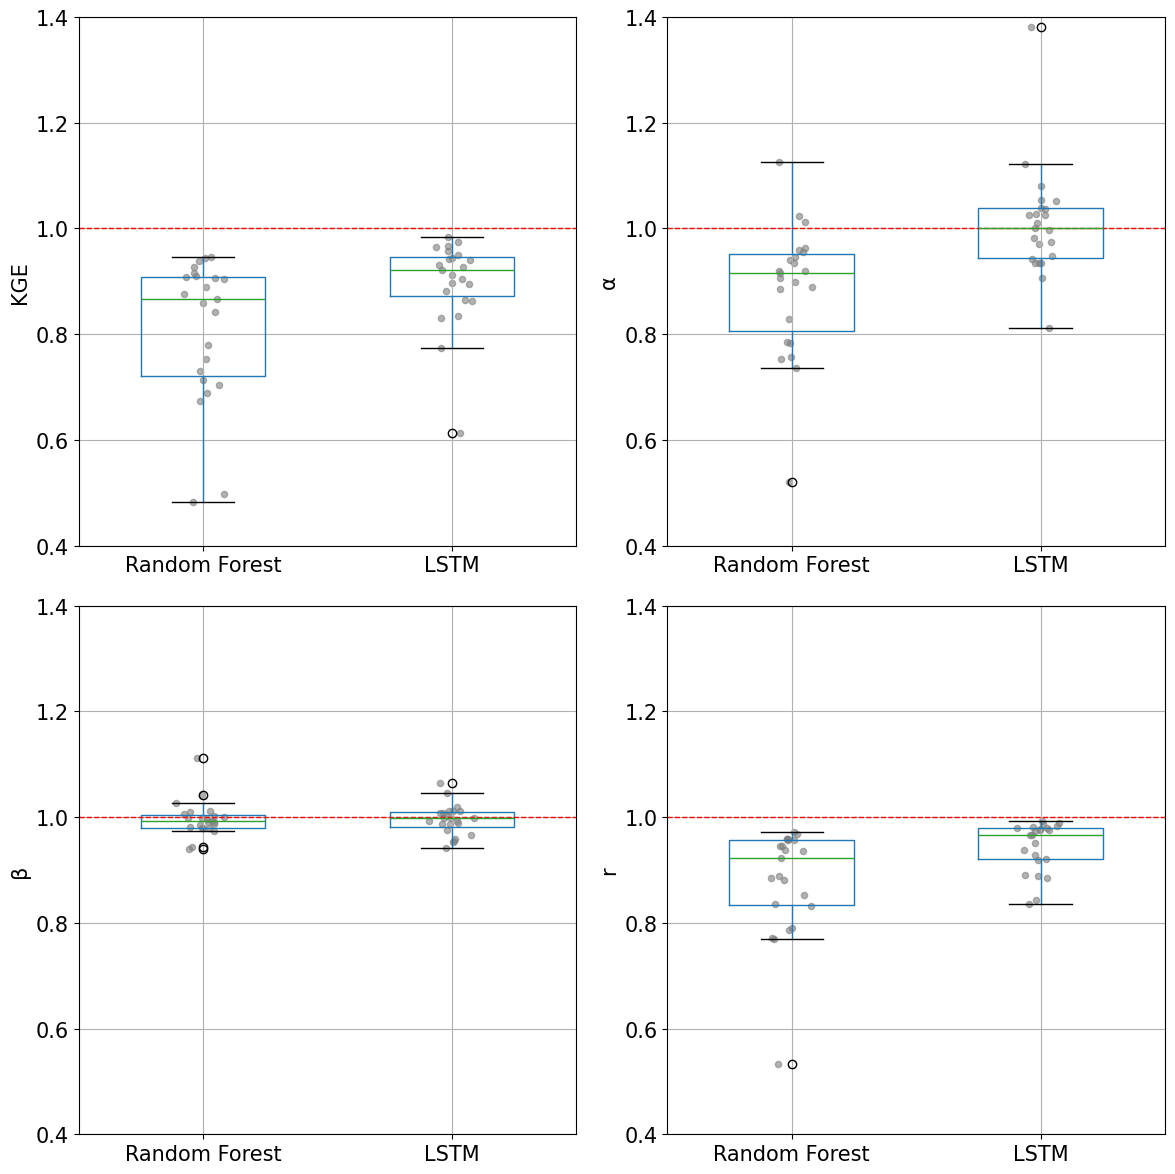

In [26]:
print("Maximum values:\n", reg_kge_df.select_dtypes(include='number').max())
print("\nMinimum values:\n", reg_kge_df.select_dtypes(include='number').min())
ymax= 1.4
ymin= 0.4
widths=0.5

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=( 12, 12 ))  # figsize adjusts the overall figure size

# Plot 1: Top Left
reg_kge_df[[  'RF_KGE', 'LSTM_KGE']].boxplot(ax=axs[0, 0], widths= widths)

for i, col in enumerate([   'RF_KGE', 'LSTM_KGE' ], start=1):
    y1 = reg_kge_df[col].values

    x1 = np.random.normal(i, 0.04, size=len(y1))
    axs[0, 0].scatter(x1, y1, s=20, color='grey', alpha=0.6)

axs[0, 0].set_ylabel( "KGE")

axs[0, 0].set_xticklabels(['Random Forest','LSTM']
                          #, rotation=45
                          )
axs[0, 0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axs[0, 0].set_ylim( ymin, ymax )

plt.tight_layout()

# Plot 2: Top Right


reg_kge_df[[  'RF_KGE_Alpha', 'LSTM_KGE_Alpha']].boxplot(ax=axs[0, 1]  , widths= widths )

for i, col in enumerate([   'RF_KGE_Alpha', 'LSTM_KGE_Alpha' ], start=1):
    y1 = reg_kge_df[col].values

    x1 = np.random.normal(i, 0.04, size=len(y1))
    axs[0, 1].scatter(x1, y1, s=20, color='grey', alpha=0.6)
#
axs[0, 1].set_ylabel( "α")

axs[0, 1].set_xticklabels(['Random Forest','LSTM']
                          #, rotation=45
                          )
axs[0, 1].axhline(y=1, color='red', linestyle='--', linewidth=1)

axs[0, 1].set_ylim( ymin, ymax )

plt.tight_layout()

# Plot 3: Bottom Left
#axs[1, 0].plot(x, y3, color='green')
#axs[1, 0].set_title('Tangent Function')
#axs[1, 0].set_xlabel('x')
#axs[1, 0].set_ylabel('tan(x)')
#axs[1, 0].set_ylim(-5, 5)  # Limit y-axis for better visibility

reg_kge_df[[  'RF_KGE_Beta', 'LSTM_KGE_Beta']].boxplot(ax=axs[1, 0] , widths= widths )

for i, col in enumerate([   'RF_KGE_Beta', 'LSTM_KGE_Beta' ], start=1):
    y1 = reg_kge_df[col].values

    x1 = np.random.normal(i, 0.04, size=len(y1))
    axs[1, 0].scatter(x1, y1, s=20, color='grey', alpha=0.6)

axs[1, 0].set_ylabel( "β")

axs[1, 0].set_xticklabels(['Random Forest','LSTM']
                          #, rotation=45
                          )
axs[1, 0].axhline(y=1, color='red', linestyle='--', linewidth=1)

axs[1, 0].set_ylim( ymin ,  ymax )
plt.tight_layout()

# Plot 4: Bottom Right
#axs[1, 1].plot(x, y4, color='purple')
#axs[1, 1].set_title('Exponential Decay')
#axs[1, 1].set_xlabel('x')
#axs[1, 1].set_ylabel('e^-x')

reg_kge_df[[  'RF_KGE_r', 'LSTM_KGE_r']].boxplot(ax=axs[1, 1] , widths= widths )

for i, col in enumerate([   'RF_KGE_r', 'LSTM_KGE_r' ], start=1):
    y1 = reg_kge_df[col].values

    x1 = np.random.normal(i, 0.04, size=len(y1))
    axs[1, 1].scatter(x1, y1, s=20, color='grey', alpha=0.6)

axs[1, 1].set_ylabel( "r")

axs[1, 1].set_xticklabels(['Random Forest','LSTM']


                          )
axs[1, 1].axhline(y=1, color='red', linestyle='--', linewidth=1)
axs[1, 1].set_ylim( ymin ,  ymax )


# Adjust layout to prevent overlapping
plt.tight_layout()

plt.savefig("kge_panels.png" , dpi= dpi )

# Show the plot
plt.show()

 create two side-by-side boxplots (panels) from a Pandas DataFrame reg_kge_df:
  Left panel: Boxplot of LSTM_KGE_Beta
  Right panel: Boxplot of RF_KGE_Beta
  Both grouped by dam_and_diversion, and add points colored by labels
  palette is default


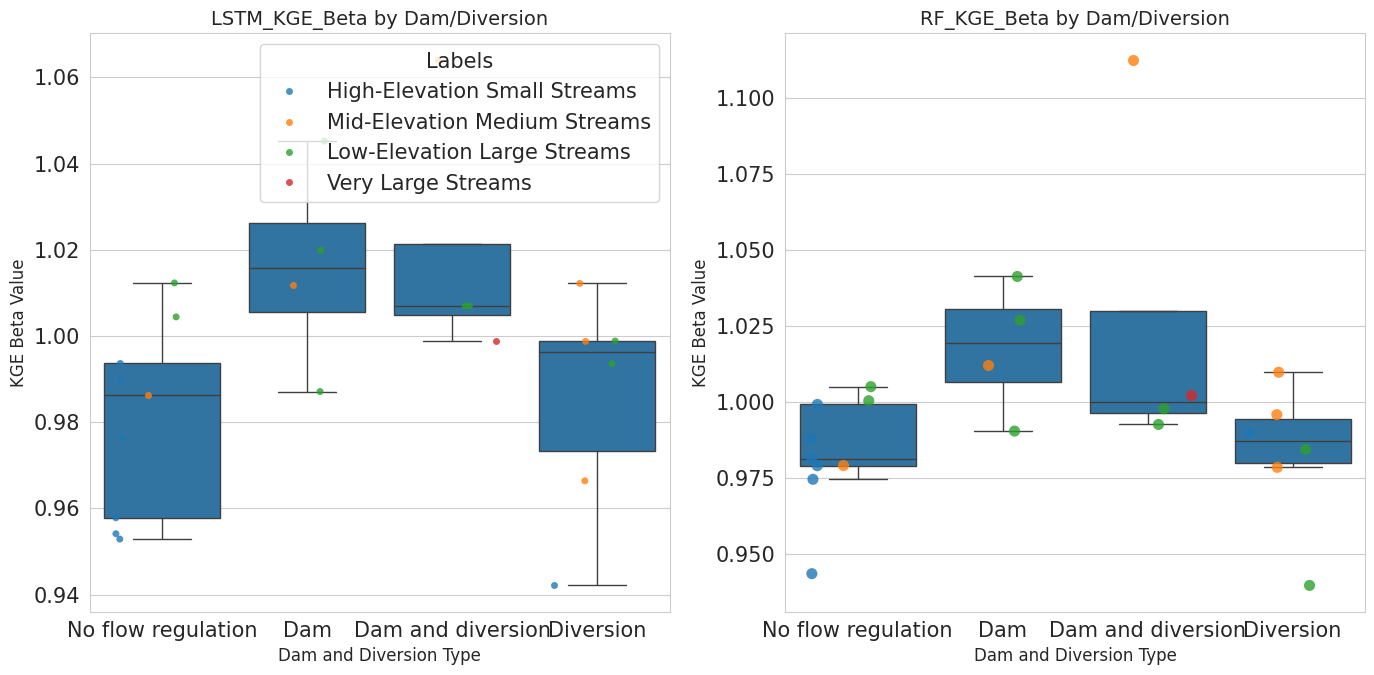

In [27]:
# Set a style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with two subplots (axes) side by side
# The figsize argument controls the overall size of the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# --- Left Panel: Boxplot for LSTM_KGE_Beta ---
# Create the boxplot on the first axis (ax1)
# 'showfliers=False' prevents seaborn from plotting the outliers,
# as we'll plot them ourselves with stripplot.
sns.boxplot(x='dam_and_diversion', y='LSTM_KGE_Beta', data=reg_kge_df ,
            #palette='Set3',
            ax=ax1, showfliers=False)

# Add the individual data points (stripplot) on top of the boxplot
# 'hue' colors the points based on the 'labels' column
sns.stripplot(x='dam_and_diversion', y='LSTM_KGE_Beta', hue='labels', data=reg_kge_df,
              #palette='dark',
              ax=ax1, jitter=True, dodge=True, size=5, alpha=0.8)

# Set a title and labels for the left plot
ax1.set_title('LSTM_KGE_Beta by Dam/Diversion', fontsize=14)
ax1.set_xlabel('Dam and Diversion Type', fontsize=12)
ax1.set_ylabel('KGE Beta Value', fontsize=12)

# --- Right Panel: Boxplot for RF_KGE_Beta ---
# Create the boxplot on the second axis (ax2)
sns.boxplot(x='dam_and_diversion', y='RF_KGE_Beta', data=reg_kge_df,
            #palette='Set3',
            ax=ax2, showfliers=False)

# Add the individual data points (stripplot) on top of the boxplot
sns.stripplot(x='dam_and_diversion', y='RF_KGE_Beta', hue='labels', data=reg_kge_df,
              #palette='dark',
              ax=ax2, jitter=True, dodge=True, size= size, alpha=0.8)

# Set a title and labels for the right plot
ax2.set_title('RF_KGE_Beta by Dam/Diversion', fontsize=14)
ax2.set_xlabel('Dam and Diversion Type', fontsize=12)
ax2.set_ylabel('KGE Beta Value', fontsize=12)

# Adjust the layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the legend only once, on the first plot
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, title='Labels')
ax2.get_legend().remove()

# Show the final plot
plt.show()

create boxplots (panels with 4 rows and 2 cols) from a Pandas DataFrame reg_kge_df: row 1: Left panel: Boxplot of LSTM_KGE Right panel: Boxplot of RF_KGE 2: Left panel: Boxplot of LSTM_KGE_r Right panel: Boxplot of RF_KGE_r row 3: Left panel: Boxplot of LSTM_KGE_Alpha Right panel: Boxplot of RF_KGE_Alpha row 4: Left panel: Boxplot of LSTM_KGE_Beta Right panel: Boxplot of RF_KGE_Beta Both grouped by dam_and_diversion, and add points colored by labels palette is default, with:
Left panel (column 1): "Random Forest"
Right panel (column 2): "LSTM"

/tmp/ipython-input-3234782829.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_yticklabels(ax.get_yticks(), fontsize= fontsize )
/tmp/ipython-input-3234782829.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_yticklabels(ax.get_yticks(), fontsize= fontsize )
/tmp/ipython-input-3234782829.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_yticklabels(ax.get_yticks(), fontsize= fontsize )
/tmp/ipython-input-3234782829.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_left.set_yticklabels(ax.get_yticks(), fontsize= fontsize )


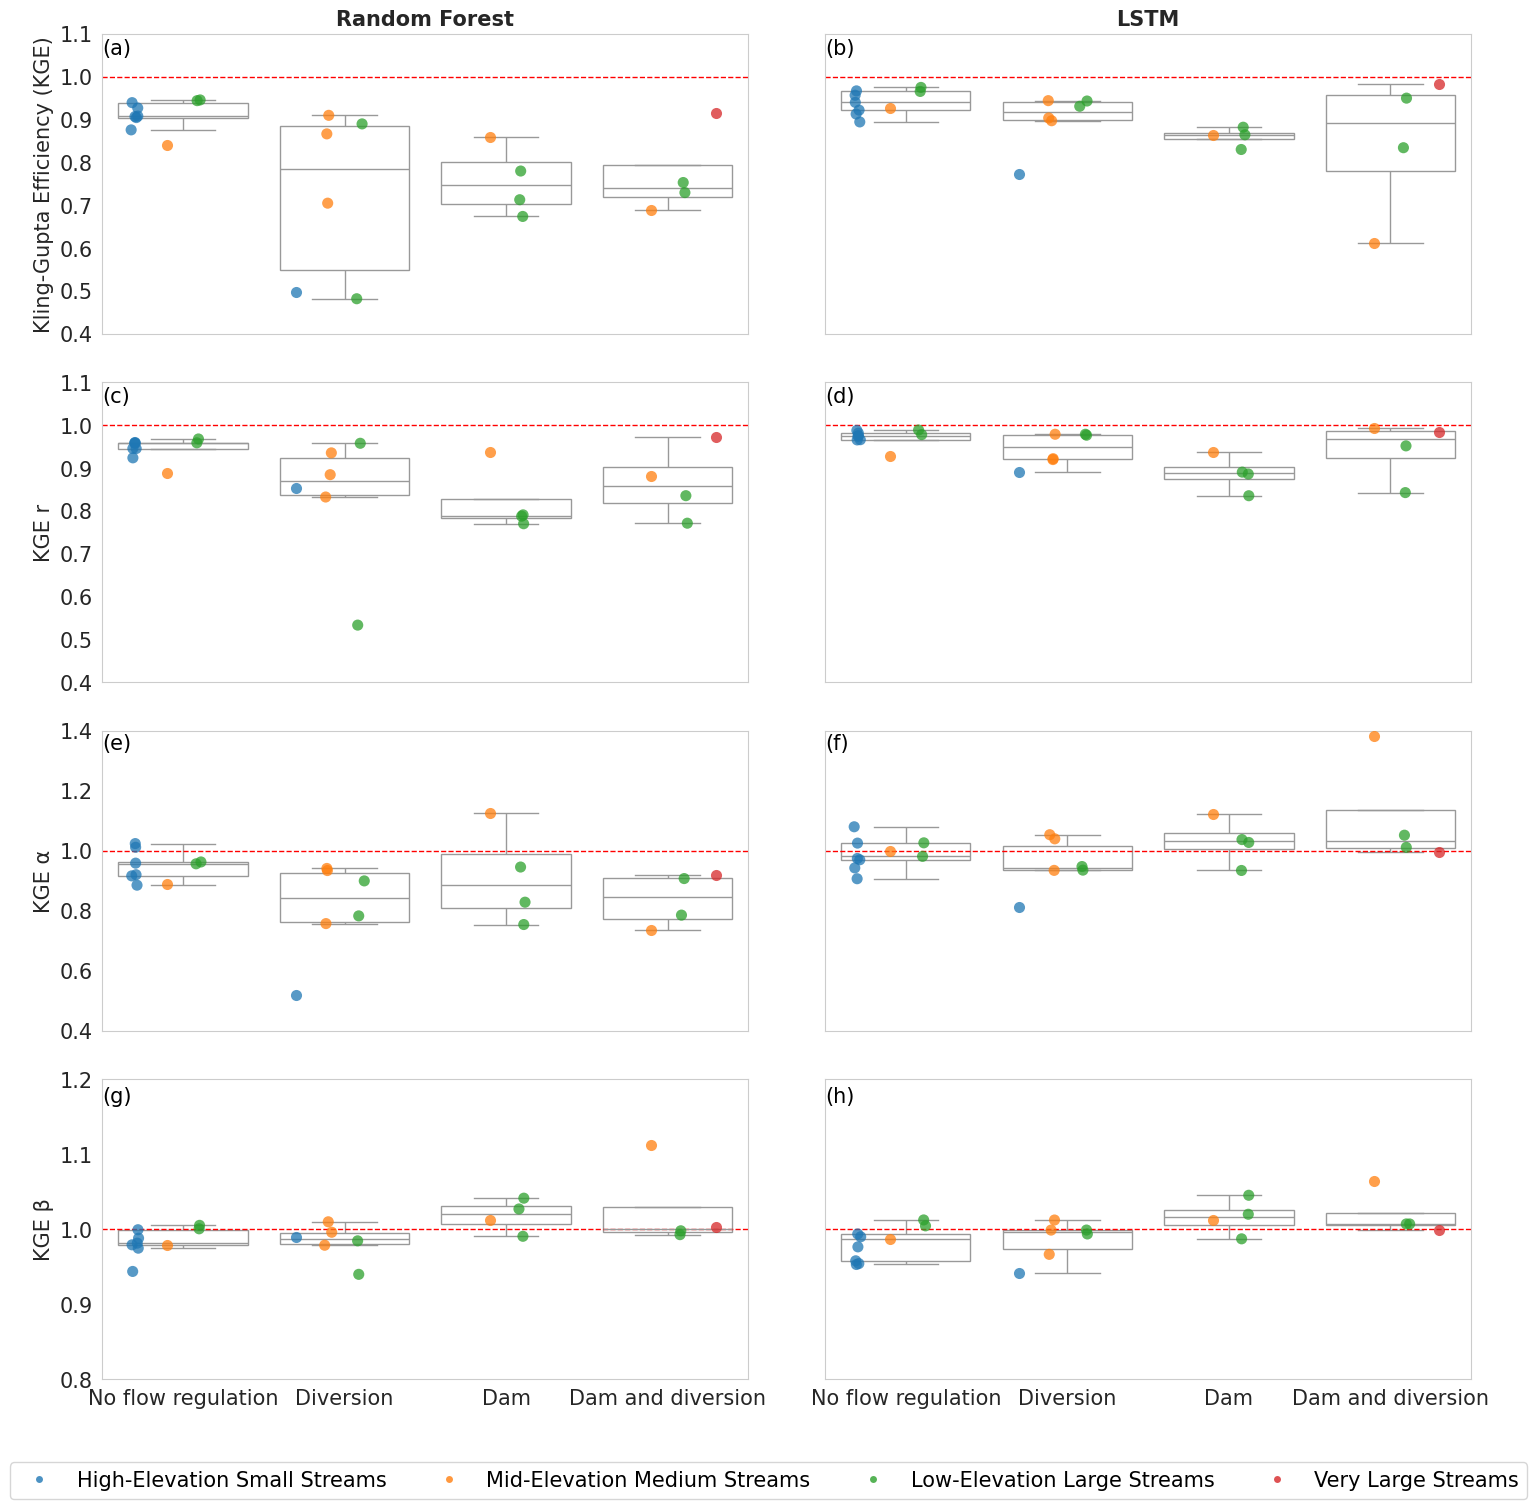

In [28]:
rotation = 0
fontsize = 15
# Create a list of letters for the subplots
letters = [chr(ord('a') + i) for i in range(len(axes.flatten()))]

# Define the columns for the panels
cols_to_plot = [
    (  'RF_KGE', 'LSTM_KGE'),
    ( 'RF_KGE_r', 'LSTM_KGE_r'),
    (  'RF_KGE_Alpha', 'LSTM_KGE_Alpha'),
    (  'RF_KGE_Beta', 'LSTM_KGE_Beta')
]

ylab = ['Kling-Gupta Efficiency (KGE)','KGE r' , 'KGE α', 'KGE β']

# Create the figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

plt.style.use('default')

#ylim_min, ylim_max = ymin, ymax

# Loop through the rows and columns to create the plots
for i, (col1, col2) in enumerate(cols_to_plot):
    # Left panel
    ax_left = axes[i, 0]
    sns.boxplot(x='dam_and_diversion', y=col1, data=reg_kge_df, ax=ax_left, showfliers=False , legend=False , order=order, color="white"
              #  , palette='viridis'
                )
    sns.stripplot(x='dam_and_diversion', y=col1, data=reg_kge_df, ax=ax_left, hue='labels', jitter=True, dodge= True ,  legend=False , order=order, size = size, alpha=0.75
                  )
    ax_left.axhline(y=1, color='red', linestyle='--', linewidth=1)
    #ax_left.set_title(f'Boxplot of {col1}')
    ax_left.set_title( "")
    ax_left.set_xlabel(' ')
    ax_left.set_ylabel( ylab[i], fontsize = fontsize)
    ax_left.tick_params(axis='x', rotation= rotation , labelsize = fontsize)
    ax_left.tick_params(axis='y', rotation= rotation , labelsize = fontsize)
   # ax_left.legend(title='Labels')
    #ax_left.set_ylim(ylim_min, ylim_max)
    # Set the title for the left panel using the letters list
    #ax_left.set_title(f'({letters[2*i]})' , loc='left' ) # The index for the left panel is 2*i

    ax_left.set_yticklabels(ax.get_yticks(), fontsize= fontsize )


    ax_left.yaxis.set_major_formatter(StrMethodFormatter("{x:.1f}"))
    ax_left.grid(False)

    # Right panel
    ax_right = axes[i, 1]
    sns.boxplot(x='dam_and_diversion', y=col2, data=reg_kge_df, ax=ax_right, showfliers=False, legend=False , order=order, color="white"
                #, palette='viridis'
                )
    sns.stripplot(x='dam_and_diversion', y=col2, data=reg_kge_df, ax=ax_right, hue='labels', jitter=True, dodge=True, legend=False , order=order, size = size, alpha=0.75
                  #, palette='viridis'
                  )
    ax_right.axhline(y=1, color='red', linestyle='--', linewidth=1)
#    ax_right.set_title(f'Boxplot of {col2}')
    #ax_right.get_yaxis().set_visible(False)
    ax_right.set_title( "")
    ax_right.set_xlabel(' ')
    ax_right.set_ylabel( '' )
    ax_right.tick_params(axis='x', rotation= rotation, labelsize = fontsize )
    #ax_right.legend("") #title='Labels')
   # ax_right.set_ylim(ylim_min, ylim_max)
    # Set the title for the right panel using the letters list
    #ax_right.set_title(f'({letters[2*i+1]})' , loc='left' ) # The index for the right panel is 2*i+1
#    ax_right.set_xticks([])

axes[0, 0].set_xticks([])
axes[0, 1].set_xticks([])
axes[0,1].set_yticks([])
y0_max = 1.1
axes[0, 0].set_ylim( 0.4,  y0_max )
axes[0, 1].set_ylim( 0.4,  y0_max )
axes[0, 0].text( -0.5, y0_max-0.01, '(a)'
                  , fontsize= fontsize
, va='top'
    )
axes[0, 1].text( -0.5, y0_max-0.01, '(b)'
                  , fontsize= fontsize
, va='top'
    )

axes[1,0].set_xticks([])
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
y1_max = 1.1
axes[1, 0].set_ylim( 0.4, y1_max )
axes[1, 1].set_ylim( 0.4, y1_max )
axes[1, 0].text( -0.5, y1_max-0.01, '(c)'
                  , fontsize= fontsize
, va='top'
    )
axes[1, 1].text( -0.5, y1_max-0.01, '(d)'
                  , fontsize= fontsize
, va='top'
    )

axes[2,0].set_xticks([])
axes[2,1].set_xticks([])
axes[2,1].set_yticks([])
y2_max = 1.4
axes[2, 0].set_ylim( 0.4, y2_max )
axes[2, 1].set_ylim( 0.4, y2_max )
axes[2, 0].text( -0.5, y2_max-0.01, '(e)'
                  , fontsize= fontsize
, va='top'
    )
axes[2, 1].text( -0.5, y2_max-0.01, '(f)'
                  , fontsize= fontsize
, va='top'
    )

y3_min = 0.8
y3_max = 1.2
axes[3, 0].set_ylim( y3_min, y3_max )
axes[3, 1].set_ylim( y3_min, y3_max )
axes[3,1].set_yticks([])
axes[3, 0].text( -0.5, y3_max-0.01, '(g)'
                  , fontsize= fontsize
, va='top'
    )
axes[3, 1].text( -0.5, y3_max-0.01, '(h)'
                  , fontsize= fontsize
, va='top'
    )

# Set big column titles
axes[0, 0].set_title("Random Forest", fontsize= fontsize , fontweight='bold')
axes[0, 1].set_title("LSTM", fontsize= fontsize, fontweight='bold')

# Add a single legend to the bottom
#handles, labels = axes[0, 0].get_legend_handles_labels()
handles, labels = ax1.get_legend_handles_labels()
#print(handles, labels )
fig.legend(
    handles, labels,
   # [<matplotlib.lines.Line2D object at 0x7a5c97244d50>, <matplotlib.lines.Line2D object at 0x7a5c96f87350>, <matplotlib.lines.Line2D object at 0x7a5c970c0a90>, <matplotlib.lines.Line2D object at 0x7a5c9c966290>], ['High-Elevation Small Streams', 'Mid-Elevation Medium Streams', 'Low-Elevation Large Streams', 'Very Large Streams'],
    loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.01), fontsize = fontsize)


plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for the legend
plt.show()

# Adjust layout to prevent titles and labels from overlapping
#plt.tight_layout()
#plt.suptitle('Multi-panel Boxplots of KGE Metrics', y=1.02, fontsize=16)

/tmp/ipython-input-2685052750.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels)) # Use a colormap for distinct colors


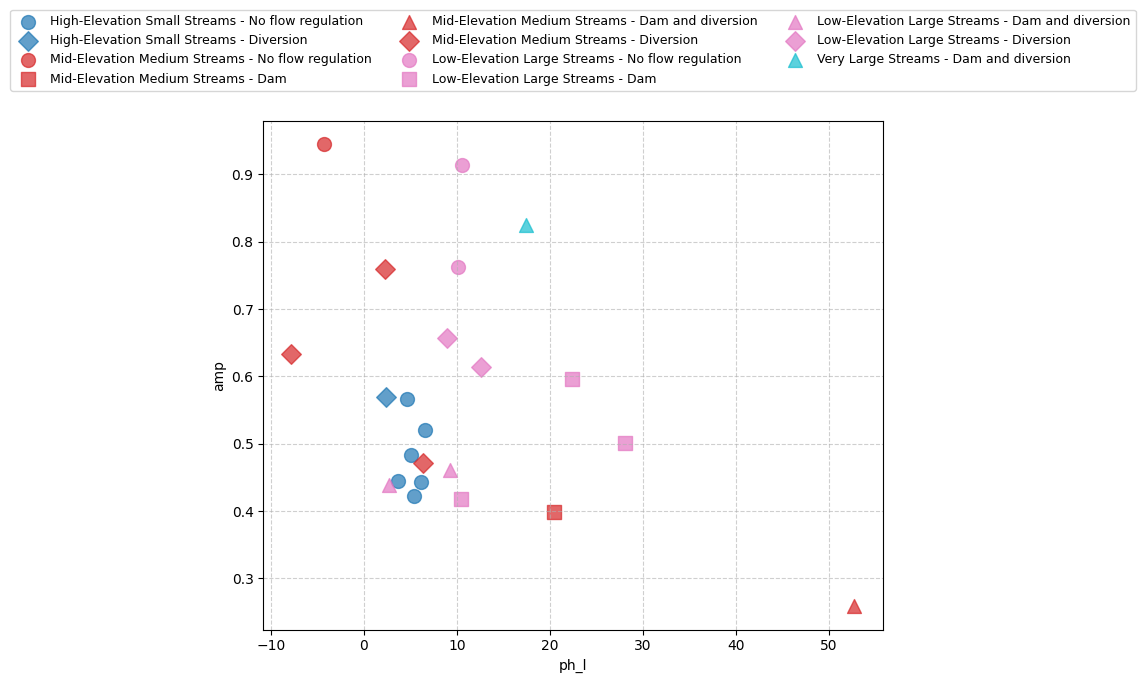

In [29]:




# Get unique values for 'labels' and 'dam_and_diversion' for mapping
unique_labels = reg_kge_df['labels'].unique()
unique_shapes = reg_kge_df['dam_and_diversion'].unique()

# Define markers and colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', '|', '_'] # More markers than labels and shapes, just in case
colors = plt.cm.get_cmap('tab10', len(unique_labels)) # Use a colormap for distinct colors

# Create mappings for shapes and colors
shape_map = {shape: marker for shape, marker in zip(unique_shapes, markers[:len(unique_shapes)])}
color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

plt.figure(figsize=(10, 7))

# Iterate through each unique combination of 'labels' and 'dam_and_diversion'
for label in unique_labels:
    for shape_val in unique_shapes:
        subset = reg_kge_df[(reg_kge_df['labels'] == label) & (reg_kge_df['dam_and_diversion'] == shape_val)]
        if not subset.empty:
            plt.scatter(
                subset['ph_l'],
                subset['amp'],
                color=color_map[label],
                marker=shape_map[shape_val],
                label=f'{label} - {shape_val}',
                s=100, # Marker size
                alpha=0.7 # Transparency
            )

plt.xlabel('ph_l')
plt.ylabel('amp')
plt.title(' ')
#plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.legend(title=None , loc='upper center' ,bbox_to_anchor=(0.5, 1.23) , ncol=3, fontsize=  9)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()


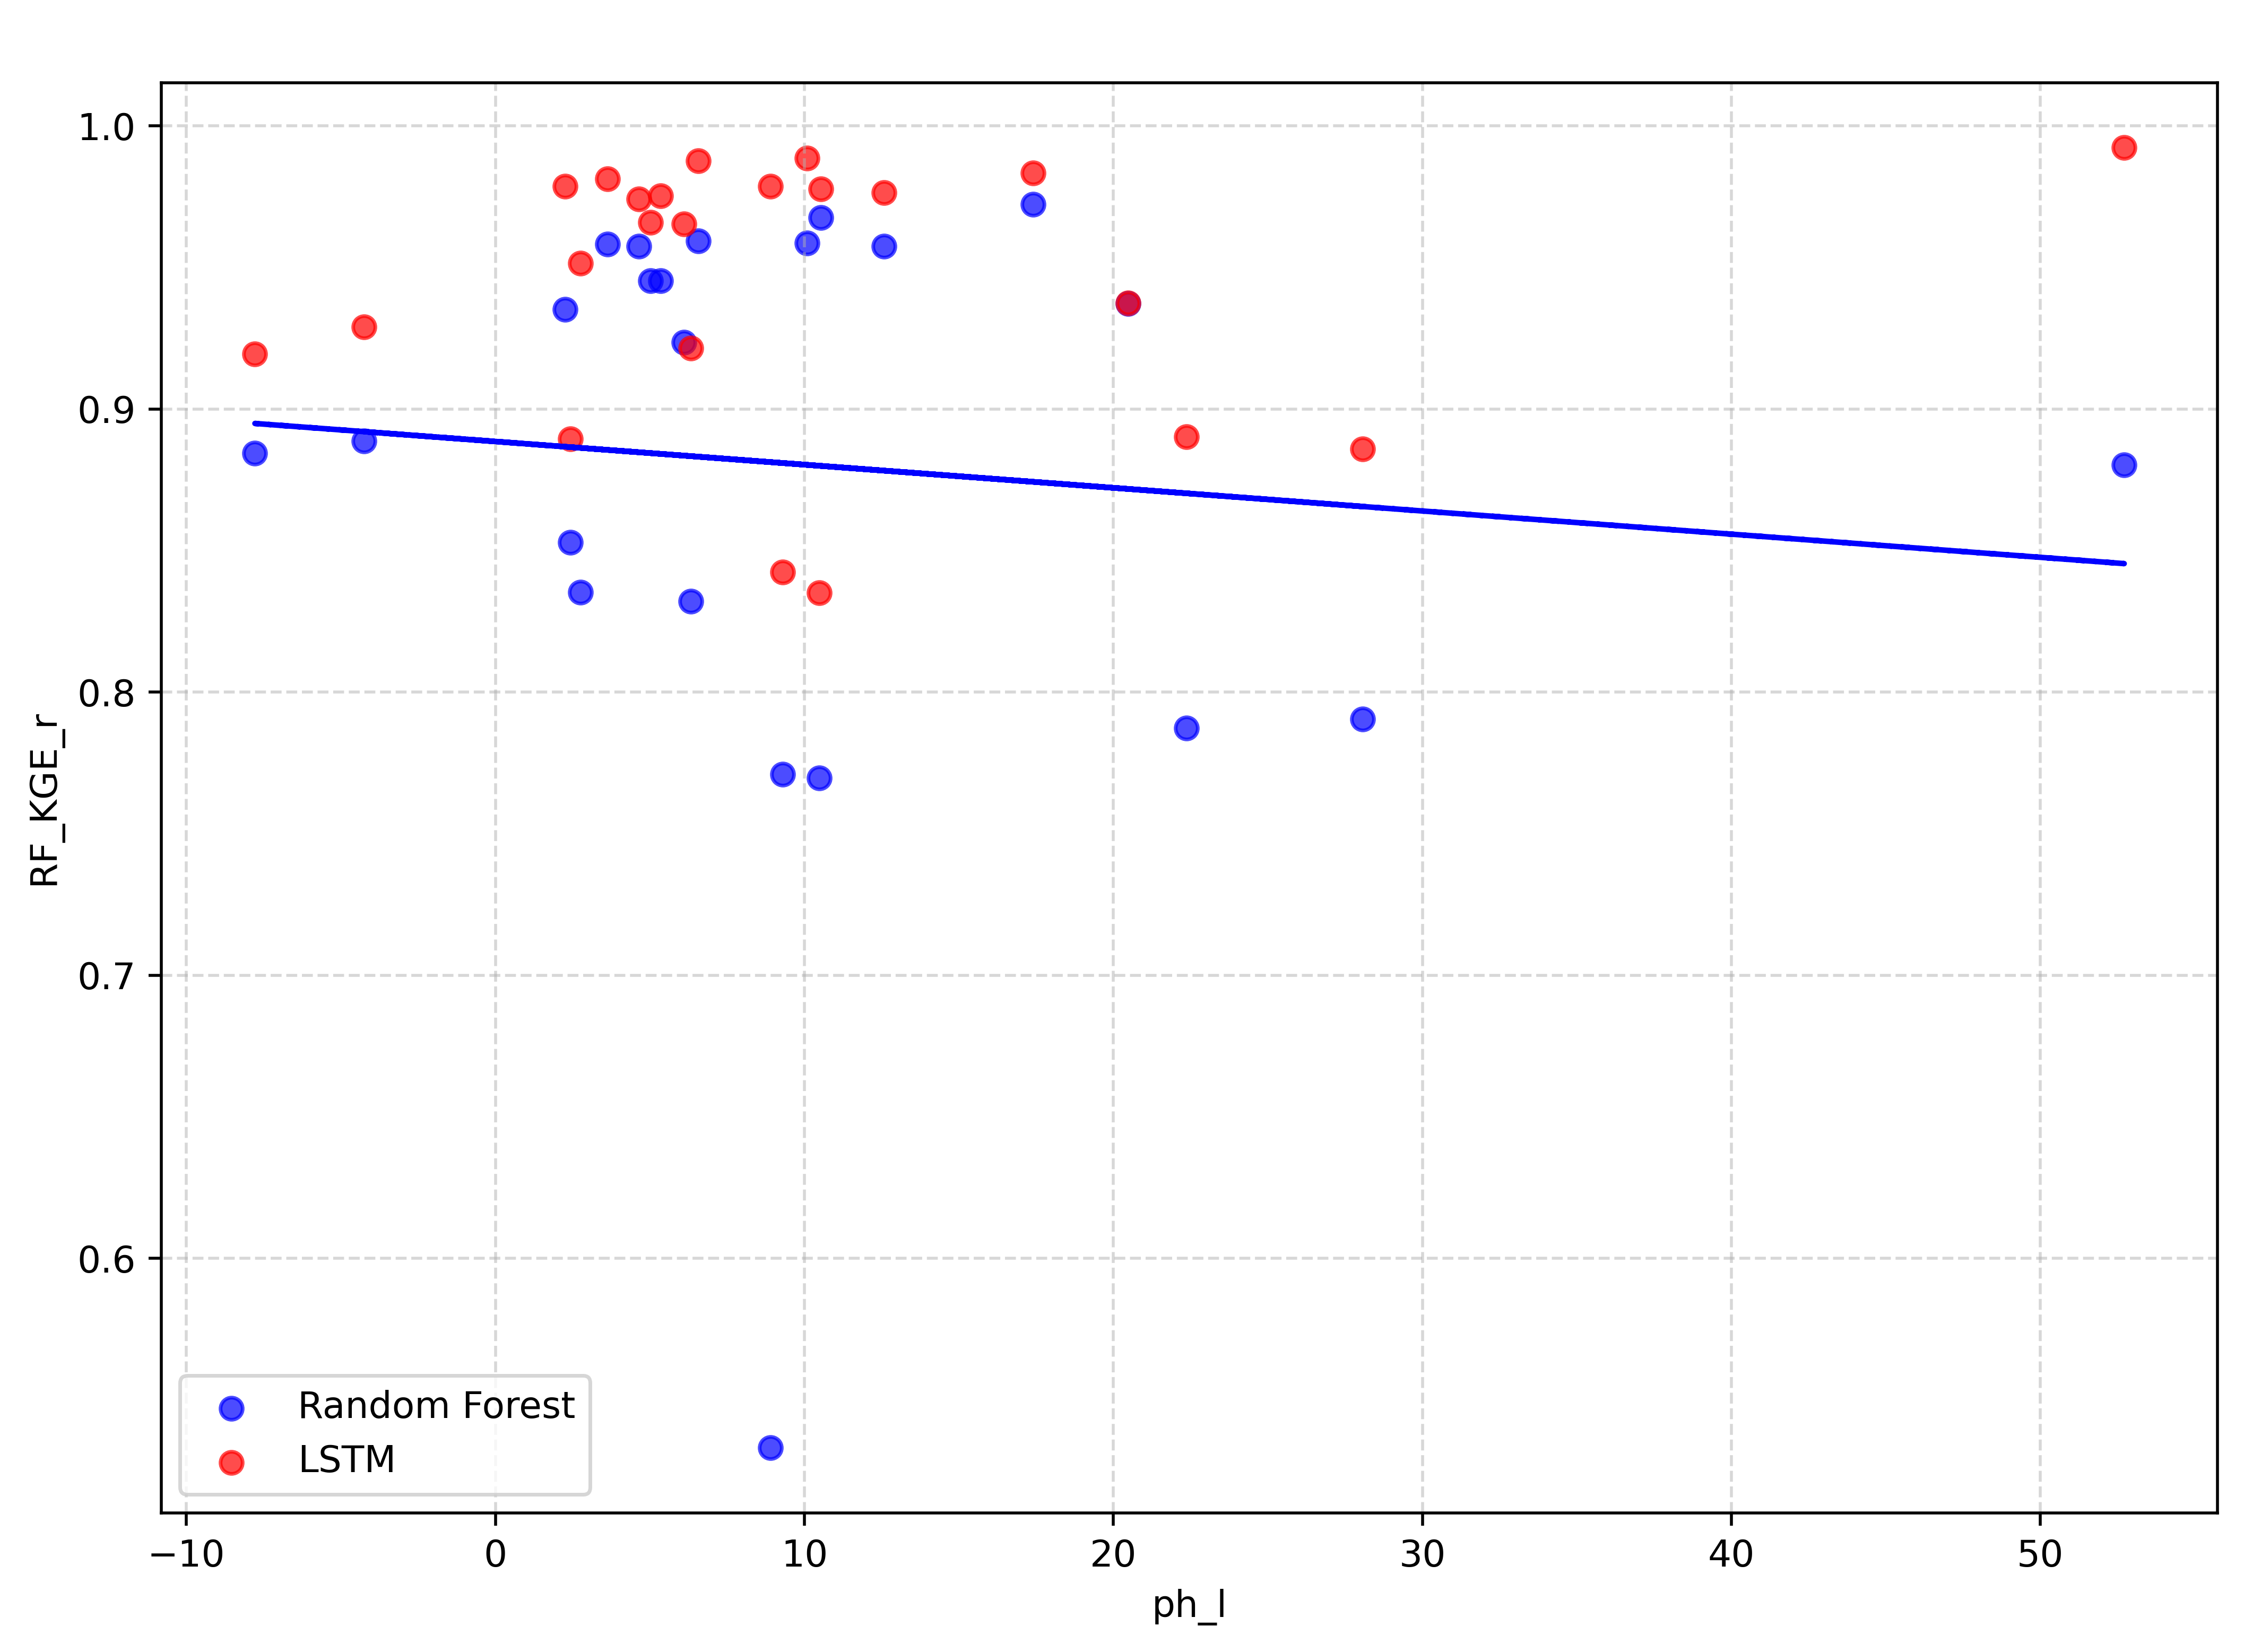

In [30]:
df = reg_kge_df

#  	RF_KGE_r	 LSTM_KGE_r	 amp	ph_l

x= 'ph_l'
yrf= 'RF_KGE_r'
ylstm= 'LSTM_KGE_r'

# Create figure with adjusted size and DPI for better quality
plt.figure(figsize=(10, 7), dpi= dpi)

plt.scatter(df[ x ], df[ yrf], color='blue', label='Random Forest', alpha=0.7)
# Fit a linear trend line (1st degree polynomial)
z = np.polyfit(df[ x ], df[ yrf ], 1)
p = np.poly1d(z)
# Plot the trend line
plt.plot(df[ x], p(df[ x]), "b--")  # "r--" means red dashed line

plt.scatter(df[ x], df[ ylstm ], color='red', label='LSTM', alpha=0.7)

plt.xlabel( x )
plt.ylabel( yrf )
plt.title(' ')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

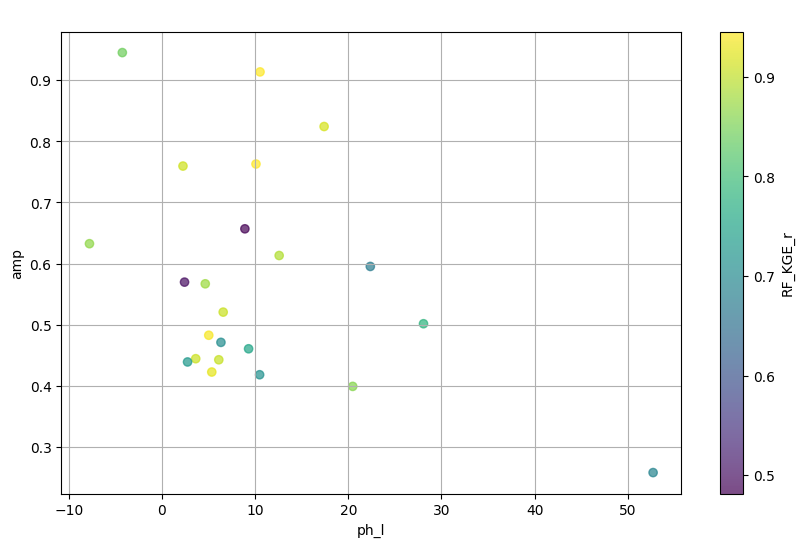

In [31]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['ph_l'], df['amp'], c=df['RF_KGE'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='RF_KGE_r')
plt.xlabel('ph_l')
plt.ylabel('amp')
plt.title(' ')
plt.grid(True)
plt.show()

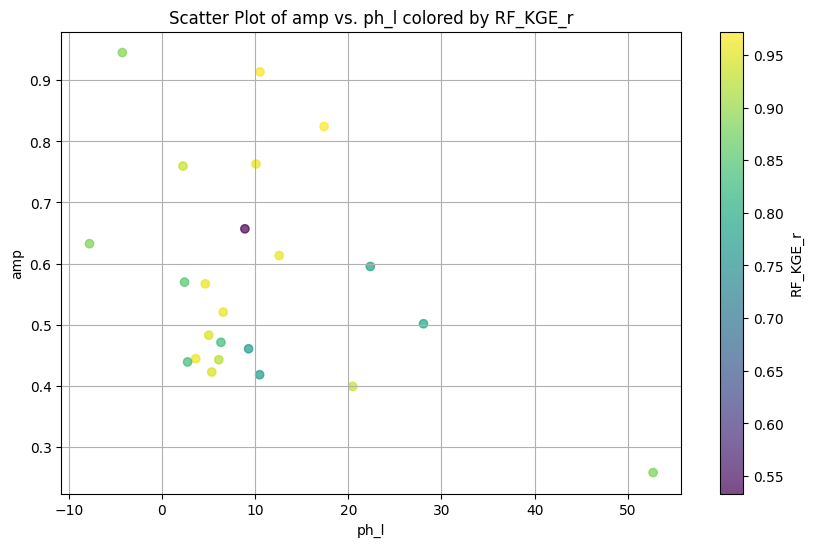

In [32]:


plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['ph_l'], df['amp'], c=df['RF_KGE_r'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='RF_KGE_r')
plt.xlabel('ph_l')
plt.ylabel('amp')
plt.title('Scatter Plot of amp vs. ph_l colored by RF_KGE_r')
plt.grid(True)
plt.show()